#### Submitted by: Umang Sehgal in Colloboration with Harkaar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Please Find all Images attached as next doc.

### 1.1 Implement The 1D GA Algorithm

#### 1D GA algorithm on computer

Number of iterations are chosen to be 10000 and the stopping criterion value Epsilon is chosen to be 1e-6

In [4]:
MAX_ITERATIONS = 10000
EPSILON_VALUE = 1e-6
PRINT_ALL = False

In [76]:
def compute_function(x):
    return -x**2

def compute_gradient(x):
    return -2*x

def perform_1d_ascent(x, R, eps = EPSILON_VALUE):
    counter = 1
    while True:
        f_x = compute_function(x)
        nabla_x = compute_gradient(x)
        if PRINT_ALL or (counter == 1):
            print_results(counter, x, f_x, nabla_x)
        if abs(nabla_x) < eps or counter == MAX_ITERATIONS:
            if not PRINT_ALL:
                print_results(counter + 1, x, f_x, nabla_x)
            break
        counter += 1
        x = x + R * nabla_x

def print_results(counter, x, f_x, nabla_x):
    print("Iteration:", counter)
    print("Function:", f_x)
    print("x:", x)
    print("Gradient:", nabla_x, "\n")
            
perform_1d_ascent(-2, 0.1)

Iteration: 1
Function: -4
x: -2
Gradient: 4 

Iteration: 71
Function: -1.692303280103038e-13
x: -4.113761393303017e-07
Gradient: 8.227522786606034e-07 



#### Experimenting with different parameter values

In [7]:
perform_1d_ascent(4, 0.4, eps = 1e-5)

Iteration: 1
Function: -16
 x: 4
Gradient: -8 

Iteration: 11
Function: -4.194303999999978e-12
 x: 2.0479999999999946e-06
Gradient: -4.095999999999989e-06 



In [8]:
perform_1d_ascent(20, 0.6, eps = 1e-4)

Iteration: 1
Function: -400
 x: 20
Gradient: -40 

Iteration: 11
Function: -1.0485759999999966e-10
 x: -1.0239999999999983e-05
Gradient: 2.0479999999999967e-05 



In [12]:
perform_1d_ascent(1000, 0.1, eps = 1e-6)

Iteration: 1
Function: -1000000
 x: 1000
Gradient: -2000 

Iteration: 98
Function: -2.473304014731049e-13
 x: 4.97323236409787e-07
Gradient: -9.94646472819574e-07 



In [11]:
perform_1d_ascent(220, 0.22, eps = 1e-4)

Iteration: 1
Function: -48400
 x: 220
Gradient: -440 

Iteration: 29
Function: -1.2217963404196952e-09
 x: 3.495420347282563e-05
Gradient: -6.990840694565126e-05 



In [20]:
perform_1d_ascent(1, 0.004, eps = 1e-4)

Iteration: 1
Function: -1
 x: 1
Gradient: -2 

Iteration: 1235
Function: -2.4990994112974293e-09
 x: 4.999099330176816e-05
Gradient: -9.998198660353633e-05 



In [17]:
perform_1d_ascent(5, 0.5, eps = 1e-5)

Iteration: 1
Function: -25
 x: 5
Gradient: -10 

Iteration: 3
Function: -0.0
 x: 0.0
Gradient: -0.0 



##### Observations
1. Varying with R = 0.5 convergence takes place with 2 iterations only regardless of other parameters.
2. For large x and low R, usually large mount of iterations happen.
3. When x is 1 and keeping R = 0.004, eps = 1e-4, the iterations reduce to 1235.  

### 1.2 Implement the 2D Version

#### Computing the GA algorithm for the 2D case

In [80]:
def f(x, A):
    return -x.T @ A @ x

def grad(x, A):
    return -2 * (A @ x)

def gradient_ascent(x, R, A):
    dim1Values = []
    dim2Values = []
    counter = 0
    while True:
        if counter < 100:
            dim1Values.append(x[0,0])
            dim2Values.append(x[1,0])
        f_x = f(x, A)
        nabla_x = grad(x, A)
        if PRINT_ALL or counter == 0:
            print_results(counter + 1, x, f_x, nabla_x)
        if np.all(abs(nabla_x) < EPSILON_VALUE) or counter == MAX_ITERATIONS - 1:
            if not PRINT_ALL:
                print_results(counter + 1, x, f_x, nabla_x)
            break
        counter += 1
        x = x + R * nabla_x

    dim1Values.append(x[0,0])
    dim2Values.append(x[1,0])
    return [dim1Values, dim2Values]

x = np.matrix("2 ; -3")
A = np.matrix("1 2 ; 2 8")
R = 0.1

plot_values = gradient_ascent(x, R, A)

Iteration: 1
Function: [[-52]]
x: [[ 2]
 [-3]]
Gradient: [[ 8]
 [40]] 

Iteration: 151
Function: [[-5.07773039e-13]]
x: [[ 1.00579570e-06]
 [-2.67103569e-07]]
Gradient: [[-9.43177125e-07]
 [ 2.50474302e-07]] 



x = \[[ 1.00579570e-06][-2.67103569e-07]\] for Number of iterations: 151

Experimenting with different parameter values

In [78]:
_ = gradient_ascent(x, 0.01, A)

Iteration: 1
Function: [[-52]]
x: [[ 2]
 [-3]]
Gradient: [[ 8]
 [40]] 

Iteration: 1563
Function: [[-5.64978147e-13]]
x: [[ 1.06093990e-06]
 [-2.81747906e-07]]
Gradient: [[-9.94888167e-07]
 [ 2.64206916e-07]] 



In [24]:
_ = gradient_ascent(x, 0.001, A)

Iteration: 1
Function: [[-52]]
 x: [[ 2]
 [-3]]
Gradient: [[ 8]
 [40]] 

Iteration: 10000
Function: [[-2.43564709e-08]]
 x: [[ 2.20283586e-04]
 [-5.84994864e-05]]
Gradient: [[-2.06569226e-04]
 [ 5.48574401e-05]] 



In [25]:
_ = gradient_ascent(x, 0.1, A)

Iteration: 1
Function: [[-52]]
 x: [[ 2]
 [-3]]
Gradient: [[ 8]
 [40]] 

Iteration: 151
Function: [[-5.07773039e-13]]
 x: [[ 1.00579570e-06]
 [-2.67103569e-07]]
Gradient: [[-9.43177125e-07]
 [ 2.50474302e-07]] 



#### Observations

1. With the learning rate set 0.01, convergence is in 1563 step.
2. On reducing the learning rate to 0.001, convergence is in 10000 iterations [Very High]
3. Lastly, when setting the learning rate to 0.1, convergence is in 151 steps

####  Visualizing the algorithm's operation

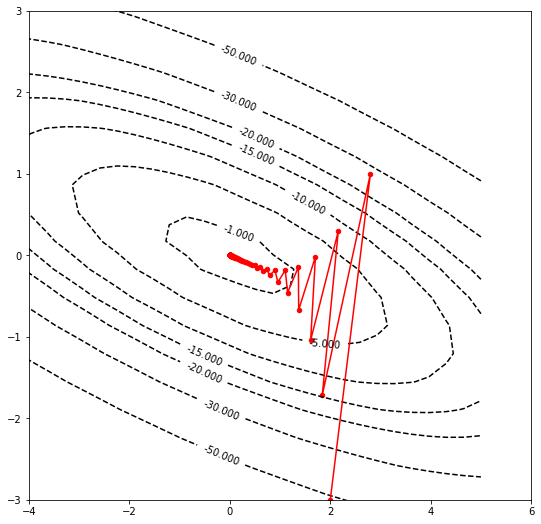

In [26]:
def plot_ga(plot_values, A, levels, xlim, ylim):
    n = 30
    ex1 = np.linspace(-5, 5, num=n)
    ex2 = np.linspace(-5, 5, num=n)
    grid1, grid2 = np.meshgrid(ex1, ex2)
    z = np.empty_like(grid1)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            x = np.array([grid1[i,j], grid2[i,j]])
            z[i,j] = f(x, A)


    plt.figure(figsize=(9,9))
    p = plt.contour(grid1, grid2, z,
                    levels = levels,
                    colors = 'black')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    plt.clabel(p, inline=1, fontsize=10)

    plt.scatter(plot_values[0], plot_values[1], c='red', s=20)
    plt.plot(plot_values[0], plot_values[1], c='red')

levels = [-50, -30, -20, -15, -10, -5, -1, 0, 15, 20, 30, 50]
xlim = [-4,6]
ylim = [-3,3]
plot_ga(plot_values, A, levels, xlim, ylim)

#### Observations

As x tries to reach the maximum of the function these contour lines describe the domain of input values, for a given output value. We observe more values of x near the maximum of 0 vs the number of values away from the maximum.

#### 5D Scaling

In [31]:
A = np.arange(1,26).reshape(5,5)
print(A)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


In [32]:
A = (1/2) * (A + A.T) + 10 * np.eye(5)
print(A)

[[11.  4.  7. 10. 13.]
 [ 4. 17. 10. 13. 16.]
 [ 7. 10. 23. 16. 19.]
 [10. 13. 16. 29. 22.]
 [13. 16. 19. 22. 35.]]


In [36]:
x = np.matrix("10 20 30 40 50").T
print(x)
_ = gradient_ascent(x, 0.1, A)

[[10]
 [20]
 [30]
 [40]
 [50]]
Iteration: 1
Function: [[-437500.]]
 x: [[10]
 [20]
 [30]
 [40]
 [50]]
Gradient: [[-2900.]
 [-4000.]
 [-5100.]
 [-6200.]
 [-7300.]] 



C:\Users\Umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in add
C:\Users\Umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


Iteration: 10000
Function: [[nan]]
 x: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Gradient: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] 



In [41]:
_ = gradient_ascent(x, 0.5, A)

Iteration: 1
Function: [[-437500.]]
 x: [[10]
 [20]
 [30]
 [40]
 [50]]
Gradient: [[-2900.]
 [-4000.]
 [-5100.]
 [-6200.]
 [-7300.]] 



C:\Users\Umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in add
C:\Users\Umang\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


Iteration: 10000
Function: [[nan]]
 x: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Gradient: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]] 



In [42]:
_ = gradient_ascent(x, 0.01, A)

Iteration: 1
Function: [[-437500.]]
 x: [[10]
 [20]
 [30]
 [40]
 [50]]
Gradient: [[-2900.]
 [-4000.]
 [-5100.]
 [-6200.]
 [-7300.]] 

Iteration: 235
Function: [[-1.21297467e-13]]
 x: [[-1.33034991e-07]
 [-7.80776550e-08]
 [-2.31203193e-08]
 [ 3.18370163e-08]
 [ 8.67943520e-08]]
Gradient: [[ 9.81682027e-07]
 [ 5.76144895e-07]
 [ 1.70607762e-07]
 [-2.34929371e-07]
 [-6.40466504e-07]] 



#### Observations
1. When learning rate is at 0.01 it takes 235 iterations which is also the least number of iterations for the 5D case.  
2. When the learning rate is at 0.5, we achieve convergence in the 1D case, however for larger dimensions the maximum is missed.

### 1.3 Condition Numbers

####  Compute the condition number for matrix A

In [43]:
def compute_eigen_values(A):
    val, vec = np.linalg.eig(A)
    return val
val = compute_eigen_values(A)

In [44]:
def compute_cond_num(eigen_vals):
    cond_num = np.sqrt(np.max(abs(eigen_vals))/np.min(abs(eigen_vals)))
    return cond_num
compute_cond_num(val)

4.694460254014038

Condition number of matrix A = 4.69

#### Show that the new matrix A is singular

In [48]:
A = np.matrix(" 1 1 ; 1 1")

In [49]:
np.linalg.det(A)

0.0

In [54]:
np.linalg.cond(A)

C:\Users\Umang\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1543: RuntimeWarning: divide by zero encountered in true_divide
  return s[..., 0]/s[..., -1]


inf

1. The matrix A is 0 hence, we can say that it is singular.
2. The condition number for this matrix is INFINITE

#### Run algorithm for 3 cases

##### Case 1: $\alpha$ = 100

*a) Hyperparameters chosen: R = 0.005*

*b) The value of C:*

In [55]:
def compute_c(alpha, A):
    C = A + alpha * np.eye(2)
    return C
C = compute_c(100, A)
print("C:", C)

C: [[101.   1.]
 [  1. 101.]]


*c) Print Eigen values and condition number*

In [56]:
eigen_vals = compute_eigen_values(C)
print("Eigen values:", eigen_vals)
print("Condition number:", compute_cond_num(eigen_vals))

Eigen values: [102. 100.]
Condition number: 1.0099504938362078


*d) Solve the problem using GA*

In [57]:
x = np.matrix("2 ; -3")
R = 0.005
plot_values = gradient_ascent(x, 0.005, C)

Iteration: 1
Function: [[-1301.]]
 x: [[ 2]
 [-3]]
Gradient: [[-398.]
 [ 602.]] 

Iteration: 6
Function: [[-5.2224e-16]]
 x: [[1.6e-09]
 [1.6e-09]]
Gradient: [[-3.264e-07]
 [-3.264e-07]] 



*e) Location of Maximum: x = \[[1.6e-09][1.6e-09]\], Number of iterations: 6*

*f) Visualize the results*

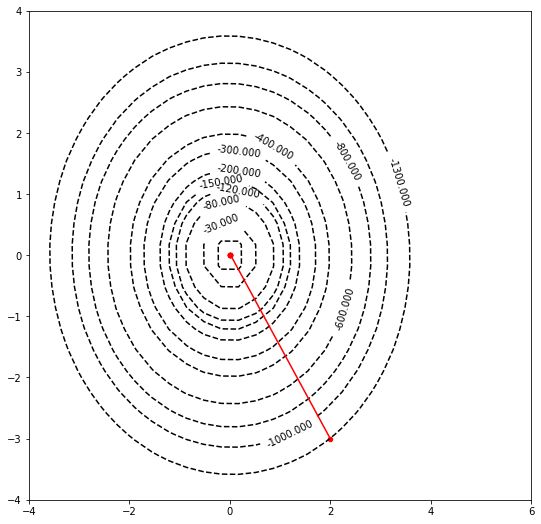

In [58]:
levels = [-1300, -1000, -800, -600, -400, -300, -200, -150, -120, -80, -30, -10, 0]
xlim = [-4,6]
ylim = [-4,4]
plot_ga(plot_values, C, levels, xlim, ylim)

##### Case 2: $\alpha = 1$

*a) Hyperparameters chosen: R = 0.1*

*b) Compute the value of C:*

In [59]:
alpha = 1
C = compute_c(alpha, A)
print("C:", C)

C: [[2. 1.]
 [1. 2.]]


*c) Print Eigen values and condition number*

In [60]:
eigen_vals = compute_eigen_values(C)
print("Eigen values:", eigen_vals)
print("Condition number:", compute_cond_num(eigen_vals))

Eigen values: [3. 1.]
Condition number: 1.7320508075688772


*d) Solve the problem using GA*

In [61]:
x = np.matrix("2 ; -3")
R = 0.1
plot_values = gradient_ascent(x, R, C)

Iteration: 1
Function: [[-14.]]
 x: [[ 2]
 [-3]]
Gradient: [[-2.]
 [ 8.]] 

Iteration: 71
Function: [[-3.38460656e-13]]
 x: [[ 4.11376139e-07]
 [-4.11376139e-07]]
Gradient: [[-8.22752279e-07]
 [ 8.22752279e-07]] 



*e) Location of Maximum: x = \[[4.11e-07][-4.11e-07]\], Number of iterations: 71*

*f) Visualize the results*

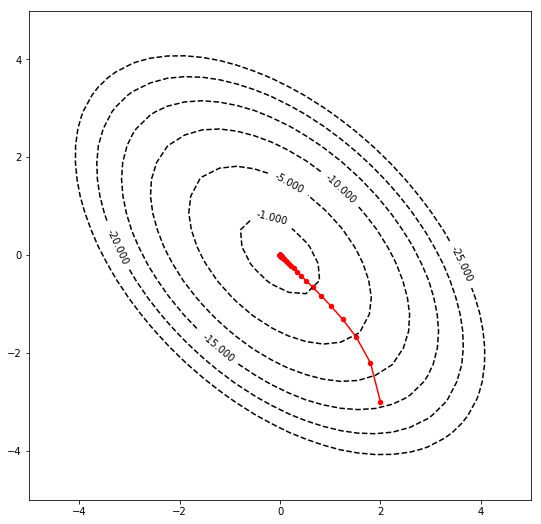

In [62]:
levels = [-25, -20, -15, -10, -5, -1, 0]
xlim = [-5,5]
ylim = [-5,5]
plot_ga(plot_values, C, levels, xlim, ylim)

##### Case 3: $\alpha$ = 0.01

*a) Hyperparameters chosen: R = 0.1*

*b) Compute the value of C:*

In [63]:
alpha = 0.01
C = compute_c(alpha, A)
print("C:", C)

C: [[1.01 1.  ]
 [1.   1.01]]


*c) Print Eigen values and condition number*

In [64]:
eigen_vals = compute_eigen_values(C)
print("Eigen values:", eigen_vals)
print("Condition number:", compute_cond_num(eigen_vals))

Eigen values: [2.01 0.01]
Condition number: 14.177446878757818


*d) Solve the problem using GA*

In [65]:
x = np.matrix("2 ; -3")
R = 0.1
plot_values = gradient_ascent(x, R, C)

Iteration: 1
Function: [[-1.13]]
 x: [[ 2]
 [-3]]
Gradient: [[1.96]
 [2.06]] 

Iteration: 5406
Function: [[-4.98954943e-11]]
 x: [[ 4.99477198e-05]
 [-4.99477198e-05]]
Gradient: [[-9.98954396e-07]
 [ 9.98954396e-07]] 



*f) Visualize the results*

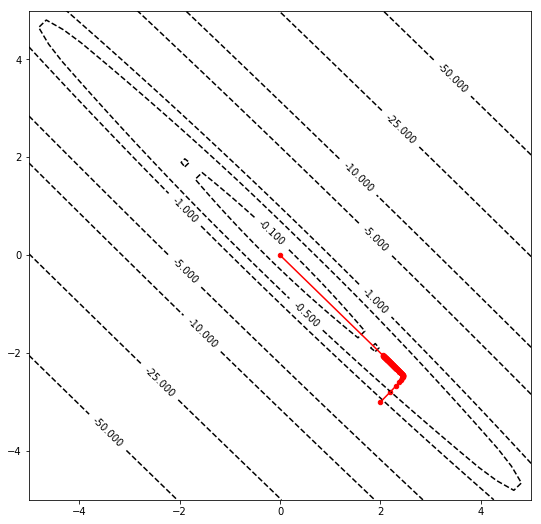

In [66]:
levels = [-50, -25, -10, -5, -1, -0.5, -0.1, 0]
xlim = [-5,5]
ylim = [-5,5]
plot_ga(plot_values, C, levels, xlim, ylim)

#### Observations
1. As matrix C moves closer to singularity, the iterations required for convergence increases from 6, 71 and 5406 iterations.
2. The speed of convergence is related to the condition number which requires more number of iterations to reach the maximum.

## 2 Outliers in different distributions

### 2.1 Normal Distribution

In [81]:
np.percentile(np.random.normal(size=100), 50)

In [95]:
def meansamples(m, n):
    mu = np.random.normal(size=(m,n)).mean(axis=1)
    barx = mu.mean()
    std = np.sqrt(mu.var())
    x1 = barx - 1.96*std
    x2 = barx + 1.96*std
    inside = np.logical_and(mu >= x1, mu <= x2).mean()
    return (barx,std,x1, x2, inside)
meansamples(1000,10000)

(5.079288581666752e-05,
 0.009925234740351249,
 -0.01940266720527178,
 0.019504252976905116,
 0.959)

### 2.1 Pareto Distribution

##### Create large number of Pareto random variables. Show the distribution on a histogram.

Text(0.5,1,'Pareto Distribution')

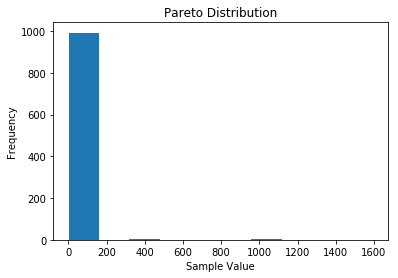

In [97]:
dist = np.random.pareto(a = 1, size = (1000)) + 1 
plt.hist(dist)
plt.xlabel("Sample Value")
plt.ylabel("Frequency")
plt.title("Pareto Distribution")

##### Create R times a sample of N Pareto values, and take a mean of those. Compute the mean-of-the-means, it's standard deviation, and 95% confidence region.

In [89]:
print_distribution_table("p")

Case: 1
Mean of means: 173336.22326696516
Standard deviation of means: 4472483.598136365
Confidence interval: 3.8394924143037725 8812.26035729819
% observations outside the 95% interval: 5.0


Case: 2
Mean of means: 2555017.5206613434
Standard deviation of means: 57329880.591668114
Confidence interval: 326.0686020888111 854731.4745561762
% observations outside the 95% interval: 5.0


Case: 3
Mean of means: 121329861.72501953
Standard deviation of means: 1990481790.0420265
Confidence interval: 29805.23917146586 198344019.59699458
% observations outside the 95% interval: 5.0


             % outside Conf  Lower Bounds  Mean of means  Std Deviation  \
Sample Size                                                               
10.0                    5.0      3.839492   1.733362e+05   4.472484e+06   
1000.0                  5.0    326.068602   2.555018e+06   5.732988e+07   
100000.0                5.0  29805.239171   1.213299e+08   1.990482e+09   

             Upper Bounds  
Sample Size   

##### Observations

1. For the normal distribution we see that predictability of the attributes increases with an increase in sample size, the effect is the opposite for a Pareto distribution, which becomes increasingly unstable.
2. The divergence effect in the Pareto distribution is more pronounced when the shape parameter ('a' in the code) is <=1. We see that the mean of means, the confidence interval and the standard deviation values become extremely large with sample size.
